<a href="https://colab.research.google.com/github/vinayp1210/ML/blob/main/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kmean clustering with centroid

In [ ]:
import numpy as np
data = np.array([[1.0, 1.5, 3.0, 5.0, 3.5, 4.5, 3.5],
                 [1.0, 2.0, 4.0, 7.0, 5.0, 5.0, 4.5]])
centroids = np.array([[1.0, 1.0],
                      [5.0,7.0]])
def assign_to_clusters(data, centroids):
  distances = np.sqrt(np.sum((data[:, np.newaxis, :] - centroids) ** 2, axis = 2))
  cluster_assignments = np.argmin(distances, axis = 1)
  return cluster_assignments
def update_centroids(data, cluster_assignments, centroids):
  new_centroids = np.array([data[cluster_assignments == i].mean(axis=0) for i in range(len(centroids))])
  return new_centroids
max_iterations = 100
for _ in range(max_iterations):
  cluster_assignments = assign_to_clusters(data.T, centroids)
  new_centroids = update_centroids(data.T, cluster_assignments, centroids)
  if np.all(centroids == new_centroids):
    break
  centroids = new_centroids
print("Final centroids:\n", centroids)
print("cluster assignment:\n", cluster_assignments)

Final centroids:
 [[1.25 1.5 ]
 [3.9  5.1 ]]
cluster assignment:
 [0 0 1 1 1 1 1]


Kmean with blobs

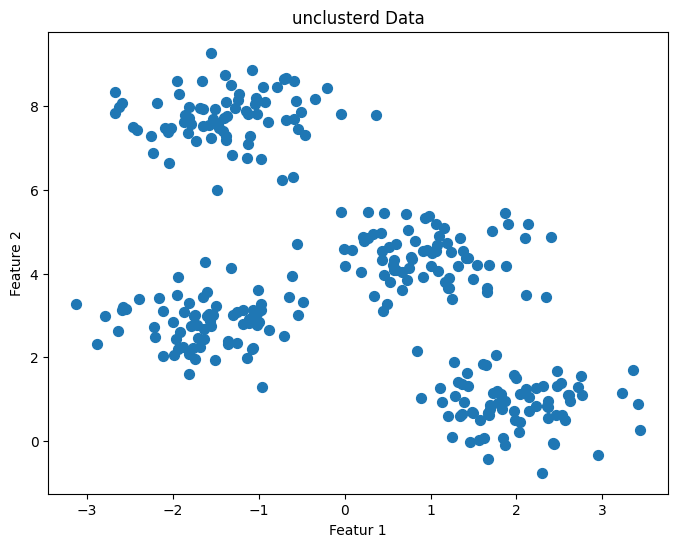

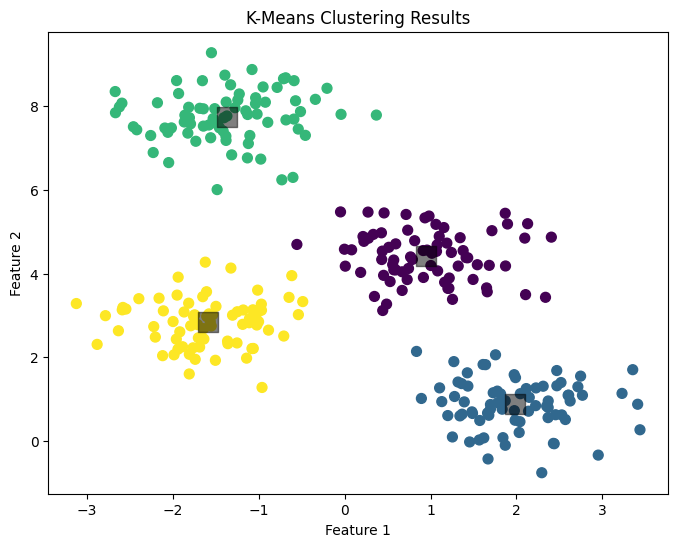

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('unclusterd Data')
plt.xlabel('Featur 1')
plt.ylabel('Feature 2')
plt.show()

kmeans =KMeans(n_clusters =4, random_state=0, n_init="auto")
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha =0.5, marker='s')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Choosing optimal K-Elbow Method

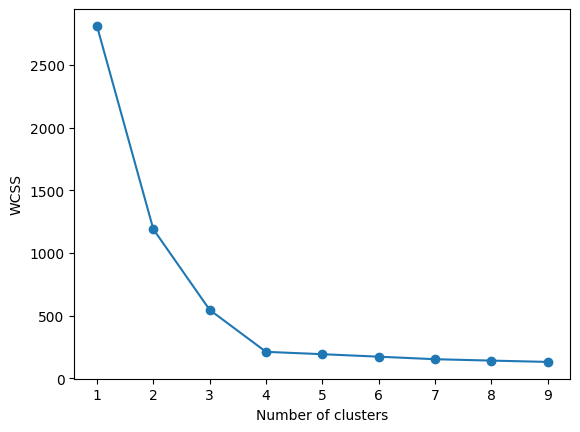

In [ ]:
wcss =[]
for k in range(1,10):
  km = KMeans(n_clusters= k)
  km.fit(X)
  wcss.append(km.inertia_)

plt.plot(range(1, 10), wcss, marker= 'o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


hierarchical clustering


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


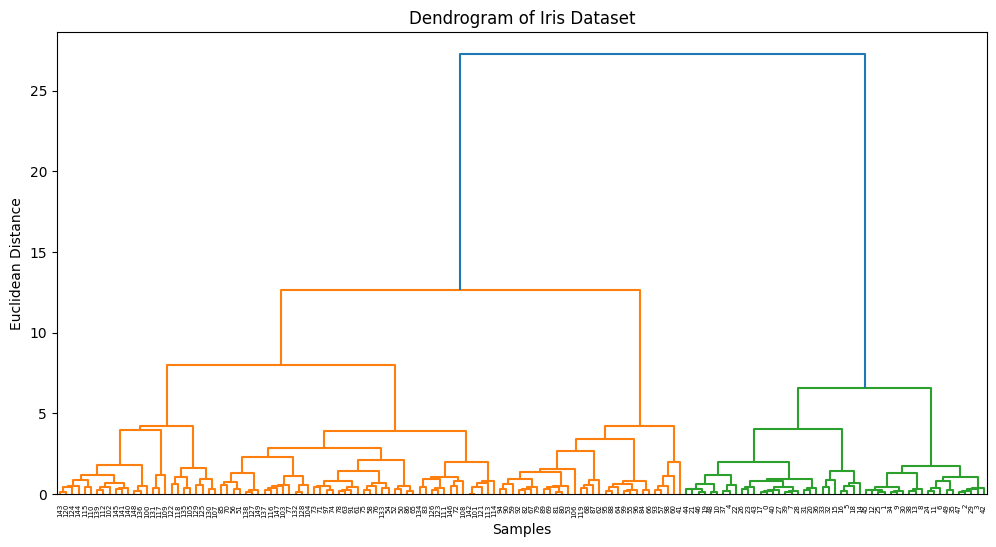

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


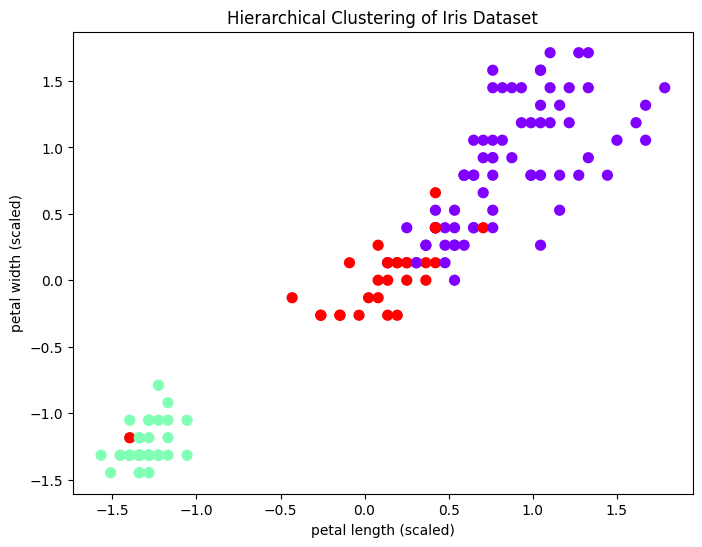

   Actual Class  Prdicted Cluster
0             0                 1
1             0                 1
2             0                 1
3             0                 1
4             0                 1
5             0                 1
6             0                 1
7             0                 1
8             0                 1
9             0                 1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(12, 6))
linked = linkage(X_scaled, method='ward')

dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title("Dendrogram of Iris Dataset")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

hc = AgglomerativeClustering(
    n_clusters=3,
    metric = 'euclidean',
    linkage = 'ward'
)
clusters = hc.fit_predict(X_scaled)

df['Cluster']= clusters
print(df.head())

plt.figure(figsize=(8, 6))

plt.scatter(
    X_scaled[:, 2],
    X_scaled[:, 3],
    c=clusters,
    cmap= 'rainbow',
    s=50
)

plt.title("Hierarchical Clustering of Iris Dataset")
plt.xlabel("petal length (scaled)")
plt.ylabel("petal width (scaled)")
plt.show()

comparison = pd.DataFrame({
    'Actual Class': y,
    'Prdicted Cluster': clusters
})

print(comparison.head(10))

In [ ]:
data=pd.read_csv('book.csv')
data

,student,ID,attendance,CIE,ESE
0,1,s1,95,18,92
1,2,s2,99,95,93
2,3,s3,97,12,99
3,4,s4,92,14,89
4,5,s5,100,15,90
5,6,s6,65,17,91
6,7,s7,78,19,76
7,8,s8,85,20,87
8,9,s9,98,20,88
9,10,s10,99,19,67


In [ ]:
df=pd.DataFrame(data)
df
new=df.drop('ESE', axis=True)
new

,student,ID,attendance,CIE
0,1,s1,95,18
1,2,s2,99,95
2,3,s3,97,12
3,4,s4,92,14
4,5,s5,100,15
5,6,s6,65,17
6,7,s7,78,19
7,8,s8,85,20
8,9,s9,98,20
9,10,s10,99,19


Dataset (10 rows):
   student   ID  attendance  CIE  ESE
0        1   s1          95   18   92
1        2   s2          99   95   93
2        3   s3          97   12   99
3        4   s4          92   14   89
4        5   s5         100   15   90
5        6   s6          65   17   91
6        7   s7          78   19   76
7        8   s8          85   20   87
8        9   s9          98   20   88
9       10  s10          99   19   67


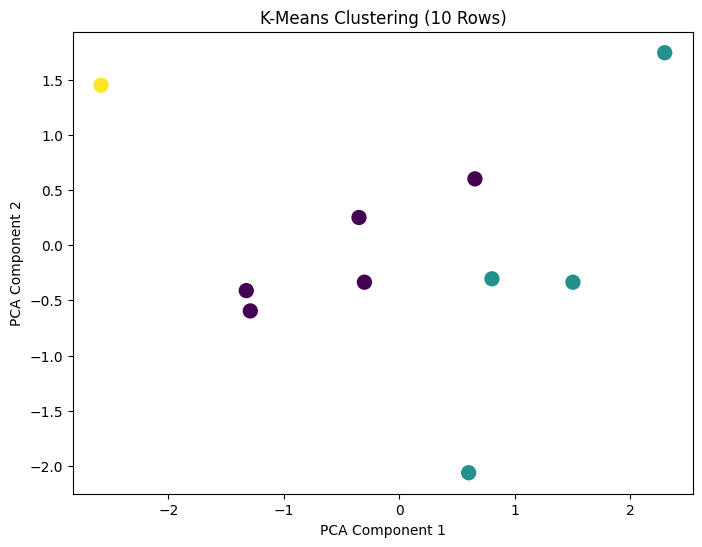

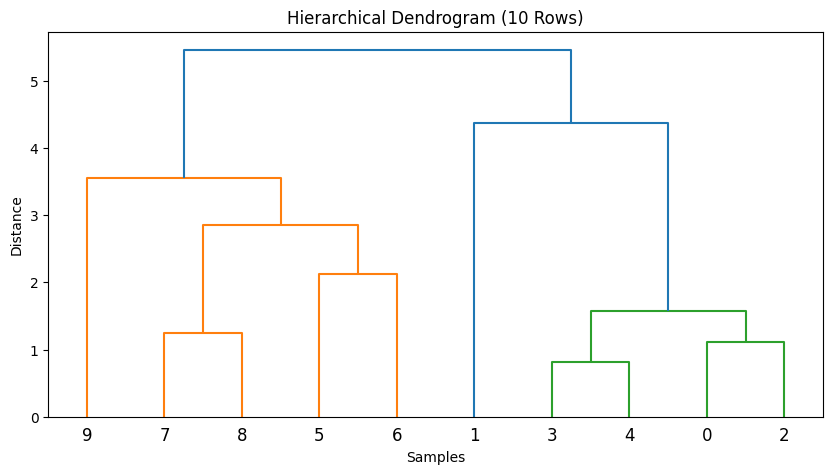

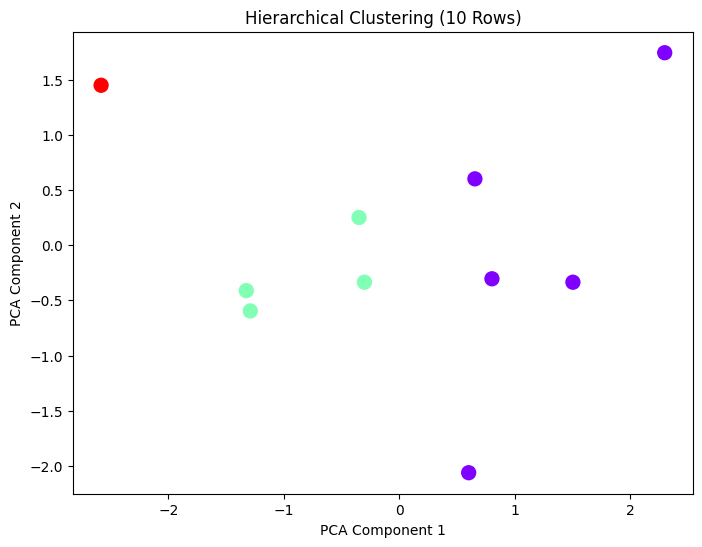


Clustered data saved as clustered_10_rows.csv
   student   ID  attendance  CIE  ESE  KMeans_Cluster  Hierarchical_Cluster
0        1   s1          95   18   92               0                     1
1        2   s2          99   95   93               2                     2
2        3   s3          97   12   99               0                     1
3        4   s4          92   14   89               0                     1
4        5   s5         100   15   90               0                     1
5        6   s6          65   17   91               1                     0
6        7   s7          78   19   76               1                     0
7        8   s8          85   20   87               1                     0
8        9   s9          98   20   88               0                     0
9       10  s10          99   19   67               1                     0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv("dataset.csv").head(10)
print("Dataset (10 rows):")
print(df)

# Use only numeric columns
X = df.select_dtypes(include=[np.number])

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-MEANS CLUSTERING
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df['KMeans_Cluster'],
    cmap='viridis',
    s=100
)
plt.title("K-Means Clustering (10 Rows)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# HIERARCHICAL CLUSTERING
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Dendrogram (10 Rows)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df['Hierarchical_Cluster'],
    cmap='rainbow',
    s=100
)
plt.title("Hierarchical Clustering (10 Rows)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

df.to_csv("clustered_10_rows.csv", index=False)
print("\nClustered data saved as clustered_10_rows.csv")
print(df)
